In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

In [3]:
lows_a2a = []
highs_a2a = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a2a.extend(df[:10_000]["fr_0"])
    highs_a2a.extend(df[-10_000:]["fr_0"])
    cnx.close()
    
lows_a2a_p = []
highs_a2a_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a2a_p.extend(df[:10_000]["pref_0"])
    highs_a2a_p.extend(df[-10_000:]["pref_0"])
    cnx.close()
    
lows_a1 = []
highs_a1 = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a1.extend(df[:10_000]["fr_1"])
    highs_a1.extend(df[-10_000:]["fr_1"])
    cnx.close()
    
lows_a1_p = []
highs_a1_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a1_p.extend(df[:10_000]["pref_1"])
    highs_a1_p.extend(df[-10_000:]["pref_1"])
    cnx.close()
    
lows_herg = []
highs_herg = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_herg.extend(df[:10_000]["fr_2"])
    highs_herg.extend(df[-10_000:]["fr_2"])
    cnx.close()
    
lows_herg_p = []
highs_herg_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_herg_p.extend(df[:10_000]["pref_2"])
    highs_herg_p.extend(df[-10_000:]["pref_2"])
    cnx.close()
    
lows_ras = []
highs_ras = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_ras.extend(df[:10_000]["fr_3"])
    highs_ras.extend(df[-10_000:]["fr_3"])
    cnx.close()
    
lows_ras_p = []
highs_ras_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_ras_p.extend(df[:10_000]["pref_3"])
    highs_ras_p.extend(df[-10_000:]["pref_3"])
    cnx.close()
    
lows_sas = []
highs_sas = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_sas.extend(df[:10_000]["fr_4"])
    highs_sas.extend(df[-10_000:]["fr_4"])
    cnx.close()
    
lows_sas_p = []
highs_sas_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_sas_p.extend(df[:10_000]["pref_4"])
    highs_sas_p.extend(df[-10_000:]["pref_4"])
    cnx.close()

In [7]:
a = pd.DataFrame(pd.Series(lows_a2a), columns=["A2A"])
b = pd.DataFrame(pd.Series(lows_a1), columns=["A1"])
c = pd.DataFrame(pd.Series(lows_herg), columns=["hERG"])
d = pd.DataFrame(pd.Series(lows_ras), columns=["RAScore"])
e = pd.DataFrame(pd.Series(lows_sas), columns=["SAScore"])
f = pd.concat([a, b, c, d, e], axis=1)
g = pd.DataFrame(pd.Series(highs_a2a), columns=["A2A"])
h = pd.DataFrame(pd.Series(highs_a1), columns=["A1"])
i = pd.DataFrame(pd.Series(highs_herg), columns=["hERG"])
j = pd.DataFrame(pd.Series(highs_ras), columns=["RAScore"])
k = pd.DataFrame(pd.Series(highs_sas), columns=["SAScore"])
l = pd.concat([g, h, i, j, k], axis=1)
m = pd.concat([f, l], axis=0)
m.reset_index(inplace=True)
m["index"].iloc[0:80_000] = "First 80K"
m["index"].iloc[-80_000:] = "Last 80K"
m.rename(columns={"index":"samples"}, inplace=True)
m

/tmp/ipykernel_234069/210009411.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m["index"].iloc[0:80_000] = "First 80K"


,samples,A2A,A1,hERG,RAScore,SAScore
0,First 80K,0.473253,0.531316,0.382354,8.067781e-09,0.528571
1,First 80K,0.477537,0.473596,0.399821,1.178261e-08,0.534340
2,First 80K,0.541114,0.526341,0.407129,1.040052e-04,0.624092
3,First 80K,0.473306,0.470002,0.455093,9.999995e-01,0.754384
4,First 80K,0.584457,0.744037,0.403017,6.360402e-07,0.579201
...,...,...,...,...,...,...
159995,Last 80K,0.613103,0.616078,0.293070,9.999949e-01,0.818846
159996,Last 80K,0.595007,0.667115,0.371355,9.999963e-01,0.739181
159997,Last 80K,0.667895,0.641496,0.386527,7.370713e-01,0.577718
159998,Last 80K,0.588705,0.787021,0.234866,9.961060e-01,0.780619


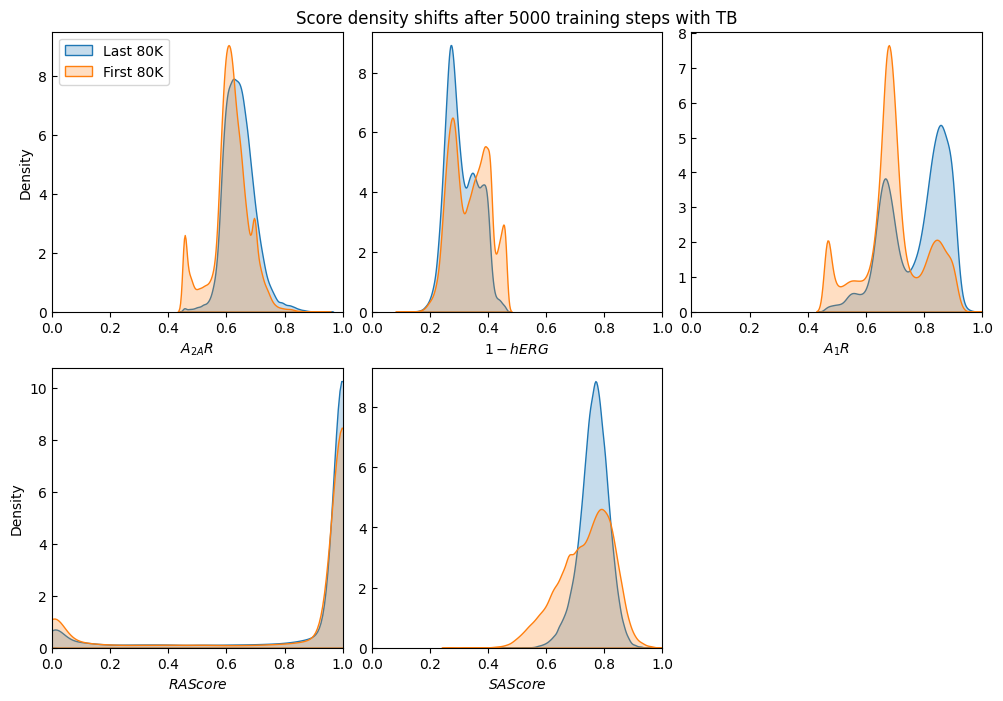

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
sns.kdeplot(m[m.samples ==  "Last 80K"]["A2A"], fill=True, ax=ax[0, 0], label="Last 80K")
sns.kdeplot(m[m.samples ==  "First 80K"]["A2A"], fill=True, ax=ax[0, 0], label="First 80K")
ax[0, 0].legend(loc="upper left")
ax[0, 0].set_xlabel("$A_{2A}R$")
ax[0, 0].set_xlim([0, 1])
ax[0, 0].tick_params(direction="in", axis="y")
sns.kdeplot(m[m.samples ==  "Last 80K"]["hERG"], fill=True, ax=ax[0, 1])
sns.kdeplot(m[m.samples ==  "First 80K"]["hERG"], fill=True, ax=ax[0, 1])
ax[0, 1].set_xlabel("$1-hERG$")
ax[0, 1].set_title("Score density shifts after 5000 training steps with TB")
ax[0, 1].set_xlim([0, 1])
ax[0, 1].set_ylabel("")
ax[0, 1].tick_params(direction="in", axis="y")
sns.kdeplot(m[m.samples ==  "Last 80K"]["A1"], fill=True, ax=ax[0, 2])
sns.kdeplot(m[m.samples ==  "First 80K"]["A1"], fill=True, ax=ax[0, 2])
ax[0, 2].set_xlabel("$A_{1}R$")
ax[0, 2].set_ylabel("")
ax[0, 2].tick_params(direction="in", axis="y")
ax[0, 2].set_xlim([0, 1])
sns.kdeplot(m[m.samples ==  "Last 80K"]["RAScore"], fill=True, ax=ax[1, 0])
sns.kdeplot(m[m.samples ==  "First 80K"]["RAScore"], fill=True, ax=ax[1, 0])
ax[1, 0].set_xlabel("$RA Score$")
# ax[1, 0].set_ylabel("")
ax[1, 0].tick_params(direction="in", axis="y")
ax[1, 0].set_xlim([0, 1])
sns.kdeplot(m[m.samples ==  "Last 80K"]["SAScore"], fill=True, ax=ax[1, 1])
sns.kdeplot(m[m.samples ==  "First 80K"]["SAScore"], fill=True, ax=ax[1, 1])
ax[1, 1].set_xlabel("$SA Score$")
ax[1, 1].set_ylabel("")
ax[1, 1].tick_params(direction="in", axis="y")
ax[1, 1].set_xlim([0, 1])
ax[1, 2].axis("off")
fig.subplots_adjust(wspace=0.1)

In [24]:
fig.savefig("../reports/drugex_synth_v2_beta_96_trajectory_balance_5000_lr5e-4.png")

In [25]:
lows_a2a = []
highs_a2a = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a2a.extend(df[:10_000]["fr_0"])
    highs_a2a.extend(df[-10_000:]["fr_0"])
    cnx.close()
    
lows_a2a_p = []
highs_a2a_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a2a_p.extend(df[:10_000]["pref_0"])
    highs_a2a_p.extend(df[-10_000:]["pref_0"])
    cnx.close()
    
lows_a1 = []
highs_a1 = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a1.extend(df[:10_000]["fr_1"])
    highs_a1.extend(df[-10_000:]["fr_1"])
    cnx.close()
    
lows_a1_p = []
highs_a1_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a1_p.extend(df[:10_000]["pref_1"])
    highs_a1_p.extend(df[-10_000:]["pref_1"])
    cnx.close()
    
lows_herg = []
highs_herg = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_herg.extend(df[:10_000]["fr_2"])
    highs_herg.extend(df[-10_000:]["fr_2"])
    cnx.close()
    
lows_herg_p = []
highs_herg_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_herg_p.extend(df[:10_000]["pref_2"])
    highs_herg_p.extend(df[-10_000:]["pref_2"])
    cnx.close()
    
lows_ras = []
highs_ras = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_ras.extend(df[:10_000]["fr_3"])
    highs_ras.extend(df[-10_000:]["fr_3"])
    cnx.close()
    
lows_ras_p = []
highs_ras_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_ras_p.extend(df[:10_000]["pref_3"])
    highs_ras_p.extend(df[-10_000:]["pref_3"])
    cnx.close()
    
lows_sas = []
highs_sas = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_sas.extend(df[:10_000]["fr_4"])
    highs_sas.extend(df[-10_000:]["fr_4"])
    cnx.close()
    
lows_sas_p = []
highs_sas_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_synth_v2_tb_beta_96_lr_5e-4_cnt/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_sas_p.extend(df[:10_000]["pref_4"])
    highs_sas_p.extend(df[-10_000:]["pref_4"])
    cnx.close()

In [26]:
a = pd.DataFrame(pd.Series(lows_a2a), columns=["A2A"])
b = pd.DataFrame(pd.Series(lows_a1), columns=["A1"])
c = pd.DataFrame(pd.Series(lows_herg), columns=["hERG"])
d = pd.DataFrame(pd.Series(lows_ras), columns=["RAScore"])
e = pd.DataFrame(pd.Series(lows_sas), columns=["SAScore"])
f = pd.concat([a, b, c, d, e], axis=1)
g = pd.DataFrame(pd.Series(highs_a2a), columns=["A2A"])
h = pd.DataFrame(pd.Series(highs_a1), columns=["A1"])
i = pd.DataFrame(pd.Series(highs_herg), columns=["hERG"])
j = pd.DataFrame(pd.Series(highs_ras), columns=["RAScore"])
k = pd.DataFrame(pd.Series(highs_sas), columns=["SAScore"])
l = pd.concat([g, h, i, j, k], axis=1)
m = pd.concat([f, l], axis=0)
m.reset_index(inplace=True)
m["index"].iloc[0:80_000] = "First 80K"
m["index"].iloc[-80_000:] = "Last 80K"
m.rename(columns={"index":"samples"}, inplace=True)
m

/tmp/ipykernel_234069/210009411.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m["index"].iloc[0:80_000] = "First 80K"


,samples,A2A,A1,hERG,RAScore,SAScore
0,First 80K,0.645588,0.868316,0.367248,1.000000,0.911511
1,First 80K,0.782632,0.692070,0.291325,0.999981,0.827992
2,First 80K,0.619693,0.654676,0.341572,0.997966,0.793961
3,First 80K,0.586072,0.625310,0.412701,0.556467,0.653692
4,First 80K,0.639790,0.666893,0.357096,0.913790,0.745184
...,...,...,...,...,...,...
159995,Last 80K,0.680336,0.835352,0.238033,0.685796,0.810225
159996,Last 80K,0.684477,0.828116,0.285007,0.999942,0.776282
159997,Last 80K,0.692965,0.730965,0.312200,0.994998,0.747971
159998,Last 80K,0.694797,0.832381,0.283646,0.999995,0.825399


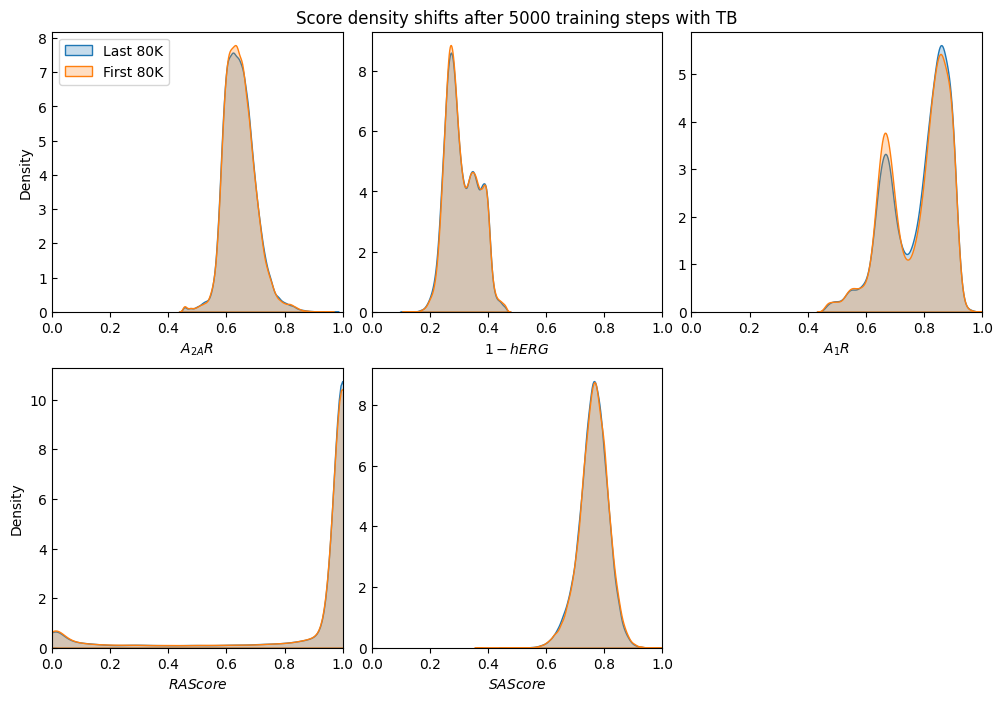

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
sns.kdeplot(m[m.samples ==  "Last 80K"]["A2A"], fill=True, ax=ax[0, 0], label="Last 80K")
sns.kdeplot(m[m.samples ==  "First 80K"]["A2A"], fill=True, ax=ax[0, 0], label="First 80K")
ax[0, 0].legend(loc="upper left")
ax[0, 0].set_xlabel("$A_{2A}R$")
ax[0, 0].set_xlim([0, 1])
ax[0, 0].tick_params(direction="in", axis="y")
sns.kdeplot(m[m.samples ==  "Last 80K"]["hERG"], fill=True, ax=ax[0, 1])
sns.kdeplot(m[m.samples ==  "First 80K"]["hERG"], fill=True, ax=ax[0, 1])
ax[0, 1].set_xlabel("$1-hERG$")
ax[0, 1].set_title("Score density shifts after 5000 training steps with TB")
ax[0, 1].set_xlim([0, 1])
ax[0, 1].set_ylabel("")
ax[0, 1].tick_params(direction="in", axis="y")
sns.kdeplot(m[m.samples ==  "Last 80K"]["A1"], fill=True, ax=ax[0, 2])
sns.kdeplot(m[m.samples ==  "First 80K"]["A1"], fill=True, ax=ax[0, 2])
ax[0, 2].set_xlabel("$A_{1}R$")
ax[0, 2].set_ylabel("")
ax[0, 2].tick_params(direction="in", axis="y")
ax[0, 2].set_xlim([0, 1])
sns.kdeplot(m[m.samples ==  "Last 80K"]["RAScore"], fill=True, ax=ax[1, 0])
sns.kdeplot(m[m.samples ==  "First 80K"]["RAScore"], fill=True, ax=ax[1, 0])
ax[1, 0].set_xlabel("$RA Score$")
# ax[1, 0].set_ylabel("")
ax[1, 0].tick_params(direction="in", axis="y")
ax[1, 0].set_xlim([0, 1])
sns.kdeplot(m[m.samples ==  "Last 80K"]["SAScore"], fill=True, ax=ax[1, 1])
sns.kdeplot(m[m.samples ==  "First 80K"]["SAScore"], fill=True, ax=ax[1, 1])
ax[1, 1].set_xlabel("$SA Score$")
ax[1, 1].set_ylabel("")
ax[1, 1].tick_params(direction="in", axis="y")
ax[1, 1].set_xlim([0, 1])
ax[1, 2].axis("off")
fig.subplots_adjust(wspace=0.1)

In [141]:
pareto = torch.load("../logs/mogfn/drugex_v2_subtb_beta_96_lr_5e-4/pareto.pt")
pf = pareto["pareto_front"]

In [173]:
pareto_tb = torch.load("../logs/mogfn/drugex_v2_tb_beta_96/pareto.pt")
pf_tb = pareto_tb["pareto_front"]

In [197]:
pareto_tb5 = torch.load("../logs/mogfn/drugex_v2_tb_beta_96_lr_5e-4/pareto.pt")
pf_tb5 = pareto_tb5["pareto_front"]

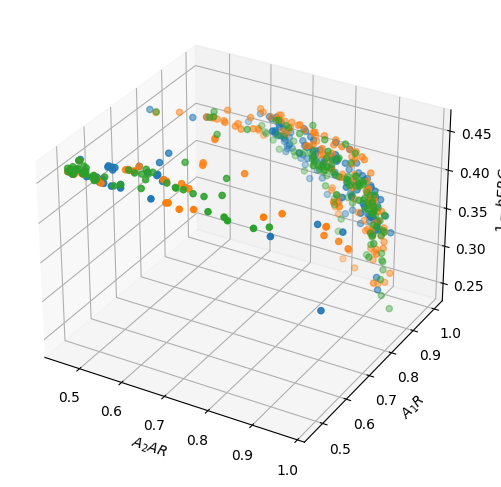

In [200]:
from matplotlib import cm

plt.close()
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("$A_{2}AR$")
ax.set_ylabel("$A_{1}R$")
ax.set_zlabel("$1-hERG$")

df = pd.DataFrame({'x': pf_tb[:,0], 'y': pf_tb[:,1], 'z': pf_tb[:,2]})
# surf = ax.plot_trisurf(df.x, df.y, df.z, linewidth=0.1, antialiased=True, edgecolor="grey", color="orange")
scatter = ax.scatter3D(df.x, df.y, df.z)
df = pd.DataFrame({'x': pf[:,0], 'y': pf[:,1], 'z': pf[:,2]})
# surf = ax.plot_trisurf(df.x, df.y, df.z, linewidth=0.1, antialiased=True, edgecolor="grey", color="blue")
scatter = ax.scatter3D(df.x, df.y, df.z)
# fig.colorbar(surf, shrink=0.4, aspect=5, location="left")    
# plt.savefig('./plots/avgErrs_vs_C_andgamma_type_%s.png'%(k))
df = pd.DataFrame({'x': pf_tb5[:,0], 'y': pf_tb5[:,1], 'z': pf_tb5[:,2]})
# surf = ax.plot_trisurf(df.x, df.y, df.z, linewidth=0.1, antialiased=True, edgecolor="grey", color="pink")
scatter = ax.scatter3D(df.x, df.y, df.z)
plt.show()

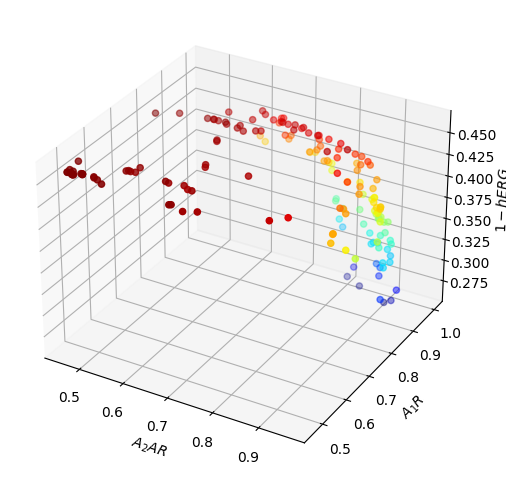

In [172]:
from matplotlib import cm

plt.close()
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("$A_{2}AR$")
ax.set_ylabel("$A_{1}R$")
ax.set_zlabel("$1-hERG$")

df = pd.DataFrame({'x': pf[:,0], 'y': pf[:,1], 'z': pf[:,2]})
# surf = ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.1, antialiased=True, edgecolor="grey")
scatter = ax.scatter3D(df.x, df.y, df.z, c=df.z, cmap=cm.jet)
# fig.colorbar(surf, shrink=0.4, aspect=5, location="left")    
# plt.savefig('./plots/avgErrs_vs_C_andgamma_type_%s.png'%(k))
plt.show()